In [28]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer,OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import mlrose
from sklearn.metrics import accuracy_score
bc = load_breast_cancer()
data=bc.data
target=bc.target

# Initialize neural network object and fit object
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

C:\Users\rosha\Anaconda2\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


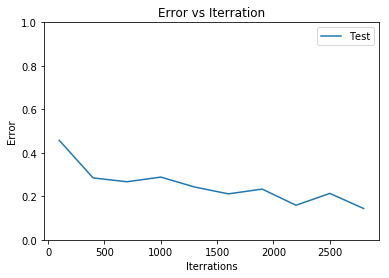

In [18]:
NUM_TIMS_TO_RUN = 100
MAX_ITTERS = 3000
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(100, MAX_ITTERS,300):
        #print(i)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'gradient_descent', max_iters = i, \
                                         bias = True, is_classifier = True, learning_rate = 0.0001, \
                                         early_stopping = True, clip_max = 5, max_attempts = 10)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([i, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([i, 1-y_test_accuracy])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction, avg_train_prediction)


plt.xlabel('Iterrations')
plt.ylabel('Error')
plt.ylim((0,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Iterration')
plt.legend()
plt.show()


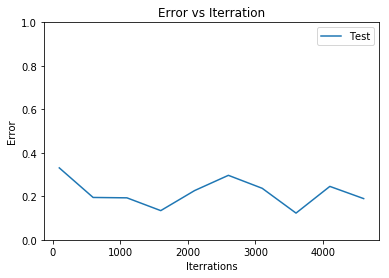

In [25]:
NUM_TIMS_TO_RUN = 10
MAX_ITTERS = 5000
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(100, MAX_ITTERS,500):
        #print(i)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'random_hill_climb', max_iters = i, \
                                         bias = True, is_classifier = True, learning_rate = 0.5, \
                                         early_stopping = True, clip_max = 5, max_attempts = 600)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([i, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([i, 1-y_test_accuracy])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction, avg_train_prediction)


plt.xlabel('Iterrations')
plt.ylabel('Error')
plt.ylim((0,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Iterration')
plt.legend()
plt.show()


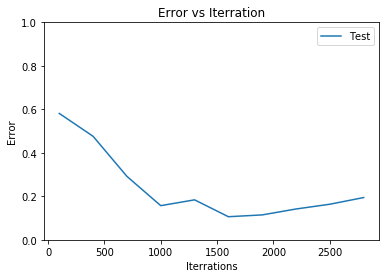

In [23]:
NUM_TIMS_TO_RUN = 20
MAX_ITTERS = 3000
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(100, MAX_ITTERS,300):
        #print(i)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'simulated_annealing', max_iters = i, \
                                         bias = True, is_classifier = True, learning_rate = 0.3, \
                                         early_stopping = True, clip_max = 5, max_attempts = 2000)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([i, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([i, 1-y_test_accuracy])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction, avg_train_prediction)


plt.xlabel('Iterrations')
plt.ylabel('Error')
plt.ylim((0,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Iterration')
plt.legend()
plt.show()


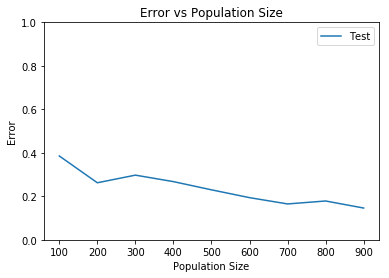

In [44]:
NUM_TIMS_TO_RUN = 20
MAX_ITTERS = 1000
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(100, MAX_ITTERS,100):
        #print(i)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'genetic_alg', max_iters = 1, \
                                         bias = True, is_classifier = True, learning_rate = .1, \
                                         mutation_prob = .1, pop_size = i,early_stopping = True, clip_max = 5, max_attempts = 10)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([i, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([i, 1-y_test_accuracy])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction, avg_train_prediction)


plt.xlabel('Population Size')
plt.ylabel('Error')
plt.ylim((0,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Population Size')
plt.legend()
plt.show()


In [36]:
print(avg_test_prediction)

[[100.           0.40438596]]
